In [ ]:
from PIL import Image
import os, glob

In [ ]:
# train_set resize
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

In [ ]:
image_dir_path = os.getenv("HOME")+"/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print('바위 이미지 resize complete')

In [ ]:
image_dir_path = os.getenv("HOME")+"/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print('보 이미지 resize complete')

In [ ]:
import numpy as np

def load_data(img_path, number_of_data=6792):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

In [ ]:
x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

In [ ]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor_test"
resize_images(image_dir_path)

print("test 가위 이미지 resize 완료!")

In [ ]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_test"
resize_images(image_dir_path)

print("test 바위 이미지 resize 완료!")

In [ ]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper_test"
resize_images(image_dir_path)

print("test 보 이미지 resize 완료!")

In [ ]:
# test img
import numpy as np

def load_data(img_path, number_of_data=383):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))
x_test_norm.shape

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[200])
print('라벨: ', y_test[200])

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

In [ ]:
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=20)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

In [ ]:
6792+383

# 실험 결과 및 고찰

- 같은 조건으로 모델만 바꿔서 이것저것 해봤지만, acc를 60%이상 올리는것은 불가능해 보였다.
- 테스트 데이터를 명확하게 찍지 않고 일부러 멀리서, 얼굴과 겹쳐서 찍은것들이 있어서 acc가 낮게 나온걸로 생각이 된다.


# i ) 질이 안좋은 test_data 를 썼을 때

## 1.
### 총 6792개의 데이터 (scissor=2320, rock=2202, paper=2270)를 train_test_split()하여 결과도출
### test_loss : 0.06632010638713837, test_accuracy : 0.9830757975578308
### train set과 test set은 같은사진이 섞여 있으므로 acc가 높게 나온다.
```
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('추가 Layer 수: ', len(model.layers))

model.summary()
```

## 2.
### 총 6792개의 train_set, 따로 만든 383개의 test_set
### test_loss : 8.766680717468262, test_accuracy : 0.20365534722805023
### 한번도 학습하지 못한 테스트셋이 들어와서 acc가 낮게 나온걸로 추정


## 3. kernel_size= (2,2)
### 총 6792개의 train_set, 따로 만든 383개의 test_set
### kernel_size=(1,1)로 했을 때 acc는 내려갔다. == kernel size크기 작은것이 acc에 비례하지않다?
### test_loss : 8.120553016662598, test_accuracy : 0.24281984567642212
```
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (2,2), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
```


## 4. kernel_size(2,2) 유지하고 , kernel 2배
### 총 6792개의 train_set, 따로 만든 383개의 test_set
### test_loss : 11.646390914916992, test_accuracy : 0.2140992134809494
```
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (2,2), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (2,2), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
```

## 5. Dense layer 하나 추가.
### 총 6792개의 train_set, 따로 만든 383개의 test_set
### test_loss : 3.6515982151031494, test_accuracy : 0.4308094084262848

```
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(6, (5,5), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(16, (5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D((5,5)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(84, activation='relu'))

model.add(keras.layers.Dense(3, activation='softmax'))
```


# ii) 배경과 손이 명확하게 구분되는 test_data를 썼을 때
## 아래부터는 7175장의 train_set과 334장의 test_set
## 고찰 및 결과는 맨 아래에

In [1]:
from PIL import Image
import os, glob

In [2]:
# train_set resize
import os
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME")+"/aiffel/rock_scissor_paper/rock"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)

print('바위 이미지 resize complete')

image_dir_path = os.getenv("HOME")+"/aiffel/rock_scissor_paper/paper"

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
resize_images(image_dir_path)

print('보 이미지 resize complete')


import numpy as np

def load_data(img_path, number_of_data=7175):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

2453  images to be resized.
2453  images resized.
가위 이미지 resize 완료!
2322  images to be resized.
2322  images resized.
바위 이미지 resize complete
2400  images to be resized.
2400  images resized.
보 이미지 resize complete
학습데이터(x_train)의 이미지 개수는 7175 입니다.
x_train shape: (7175, 28, 28, 3)
y_train shape: (7175,)


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                51232     
_________________________________________________________________
dense_1 (Dense)              (No

In [4]:
x_train_reshaped=x_train_norm.reshape(-1, 28, 28, 3)  # 데이터갯수에 -1을 쓰면 reshape시 자동계산됩니다.

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

After Reshape - x_train_reshaped shape: (7175, 28, 28, 3)
Epoch 1/10
225/225 [==============================] - 8s 16ms/step - loss: 1.0662 - accuracy: 0.4097
Epoch 2/10
225/225 [==============================] - 1s 4ms/step - loss: 0.6283 - accuracy: 0.7531
Epoch 3/10
225/225 [==============================] - 1s 4ms/step - loss: 0.3430 - accuracy: 0.8786
Epoch 4/10
225/225 [==============================] - 1s 4ms/step - loss: 0.1997 - accuracy: 0.9361
Epoch 5/10
225/225 [==============================] - 1s 4ms/step - loss: 0.1247 - accuracy: 0.9620
Epoch 6/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0901 - accuracy: 0.9752
Epoch 7/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0633 - accuracy: 0.9839
Epoch 8/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0484 - accuracy: 0.9872
Epoch 9/10
225/225 [==============================] - 1s 4ms/step - loss: 0.0326 - accuracy: 0.9936
Epoch 10/10
225/225 [====================

In [5]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")
	
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor_test"
resize_images(image_dir_path)

print("test 가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock_test"
resize_images(image_dir_path)

print("test 바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper_test"
resize_images(image_dir_path)

print("test 보 이미지 resize 완료!")

109  images to be resized.
109  images resized.
test 가위 이미지 resize 완료!
106  images to be resized.
106  images resized.
test 바위 이미지 resize 완료!
119  images to be resized.
119  images resized.
test 보 이미지 resize 완료!


In [6]:
# test img
import numpy as np

def load_data(img_path, number_of_data=334):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/paper_test/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0  # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))
x_test_norm.shape

학습데이터(x_test)의 이미지 개수는 334 입니다.
x_test shape: (334, 28, 28, 3)
y_test shape: (334,)


(334, 28, 28, 3)

In [7]:
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss : {}".format(test_loss))
print("test_accuracy : {}".format(test_accuracy))

11/11 - 2s - loss: 1.2177 - accuracy: 0.8473
test_loss : 1.2177059650421143
test_accuracy : 0.847305417060852


model.predict() 결과 :  [9.9994147e-01 1.9200041e-11 5.8469635e-05]
model이 추론한 가장 가능성이 높은 결과 :  0
실제 데이터의 라벨 :  0
예측확률분포: [0.1293176  0.3809225  0.48975992]
라벨: 1, 예측결과: 2


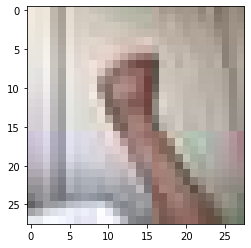

예측확률분포: [9.9999464e-01 5.3388076e-06 1.4839538e-09]
라벨: 1, 예측결과: 0


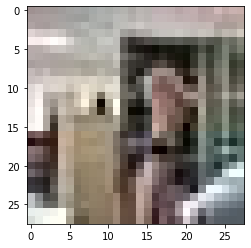

예측확률분포: [9.9999702e-01 2.9954122e-06 3.7423784e-09]
라벨: 1, 예측결과: 0


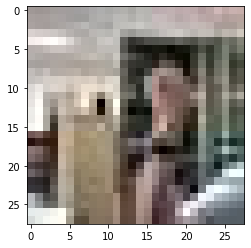

예측확률분포: [0.3672811  0.1667093  0.46600956]
라벨: 1, 예측결과: 2


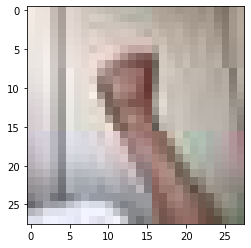

예측확률분포: [9.9999464e-01 5.3388076e-06 1.4839538e-09]
라벨: 1, 예측결과: 0


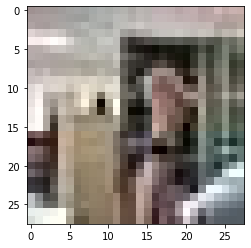

예측확률분포: [9.9998891e-01 1.0882185e-05 2.8648870e-07]
라벨: 1, 예측결과: 0


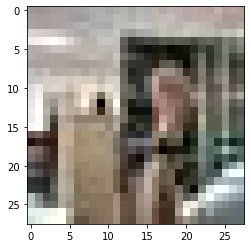

예측확률분포: [0.1293176  0.3809225  0.48975992]
라벨: 1, 예측결과: 2


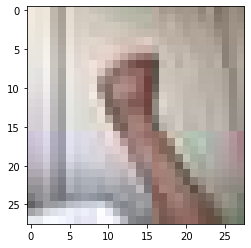

예측확률분포: [9.9997425e-01 2.5726196e-05 7.8812995e-10]
라벨: 1, 예측결과: 0


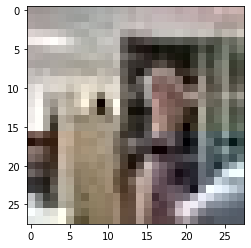

예측확률분포: [0.50735766 0.03391133 0.45873103]
라벨: 1, 예측결과: 0


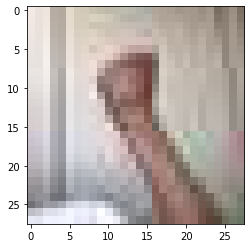

예측확률분포: [0.34511158 0.04752002 0.6073684 ]
라벨: 1, 예측결과: 2


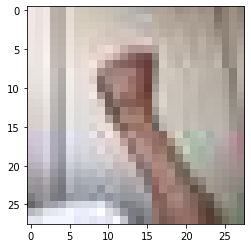

예측확률분포: [9.9999678e-01 3.1843078e-06 1.3181832e-09]
라벨: 1, 예측결과: 0


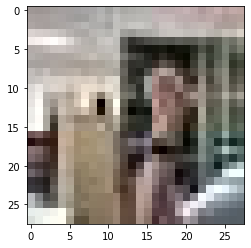

예측확률분포: [9.9999237e-01 7.6510387e-06 6.5369493e-10]
라벨: 1, 예측결과: 0


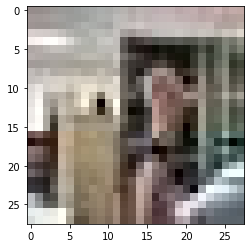

예측확률분포: [0.39230743 0.04182265 0.56587   ]
라벨: 1, 예측결과: 2


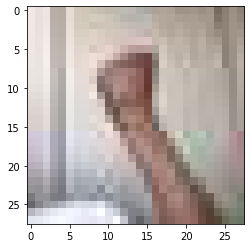

예측확률분포: [0.18889588 0.06643434 0.74466974]
라벨: 1, 예측결과: 2


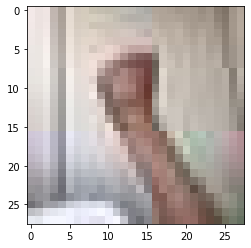

예측확률분포: [0.49776    0.03466075 0.4675793 ]
라벨: 1, 예측결과: 0


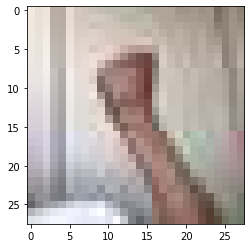

예측확률분포: [9.9999392e-01 6.0579359e-06 2.0460025e-09]
라벨: 1, 예측결과: 0


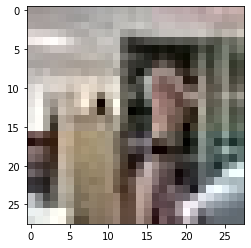

예측확률분포: [9.9999499e-01 5.0180934e-06 1.1734121e-09]
라벨: 1, 예측결과: 0


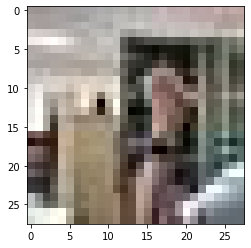

예측확률분포: [9.9999595e-01 4.0041809e-06 1.2717764e-09]
라벨: 1, 예측결과: 0


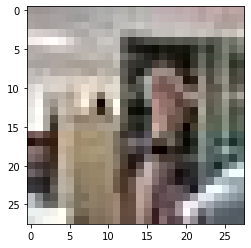

예측확률분포: [0.17906173 0.20654869 0.6143896 ]
라벨: 1, 예측결과: 2


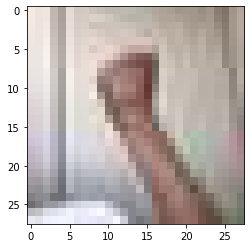

예측확률분포: [0.17906173 0.20654869 0.6143896 ]
라벨: 1, 예측결과: 2


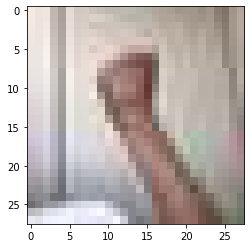

In [8]:
import matplotlib.pyplot as plt
predicted_result = model.predict(x_test_norm)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])


import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다. 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=20)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

# 고찰 및 결과
## 1. 데이터만 바꿈
### train_set : 7175, test_set : 334의 데이터
### test_loss : 3.671433925628662, test_accuracy : 0.5658682584762573
### 깔끔한 배경에서의 이미지 정확도 --> 데이터의 질이 좋아야 결과도 좋음을 알 수 있다.

```
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
```


## 2. epoch 횟수를 20회로 늘림
### train_set : 7175, test_set : 334의 데이터
### test_loss : 0.3588825464248657, test_accuracy : 0.92514967918396
### epoch를 2배로 늘리자 92%의 정확도를 보여줬다. --> 훈련을 많이 하면 항상 비례하지는 않지만 어느정도 정확도 향상에 도움이 된다.
```
model.fit(x_train_reshaped, y_train, epochs=20)
```

## 3. kernel 2배
### train_set : 7175, test_set : 334의 데이터
### test_loss : 0.4442026615142822, test_accuracy : 0.8832335472106934
### 커널을 2배로 늘리면 늘리지 않았을 경우보다 정확도가 올라갔다. --> 더 다양한 방법으로 train하기때문
```
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
```

## 4. kernel_size = (2,2)
### train_set : 7175, test_set : 334의 데이터
### test_loss : 4.644015312194824, test_accuracy : 0.4940119683742523
### 정확도가 급격하게 떨어졌다. --> 커널 사이즈가 작으면 더 디테일하게 이미지의 특징을 뽑아내서 정확도가 높아질 줄 알았지만, 지금의 test_set은 거의 깔끔한 배경에 손만 있는 이미지여서 오히려 정확도가 떨어지는 현상을 일으키는지? --> 고찰 더 필요
```
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (2,2), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (2,2), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
```


